In [5]:
import networkx as nx
import pandas as pd
import numpy as np
import numpy.linalg
import matplotlib as plt
%matplotlib inline
import csv
import re
import ast

In [6]:
medici_list = []
with open('medici_network/medici_network.txt') as f:
    reader = csv.reader(f)
    for row in reader:
        medici_list.append(row)
        print(row)

['0 Acciaiuoli', ' 0 1 [ (8', ' 1) ]']
['1 Albizzi', ' 1 3 [ (5', ' 1) (6', ' 1) (8', ' 1) ]']
['2 Barbadori', ' 2 2 [ (4', ' 1) (8', ' 1) ]']
['3 Bischeri', ' 3 3 [ (6', ' 1) (10', ' 1) (14', ' 1) ]']
['4 Castellani', ' 4 3 [ (2', ' 1) (10', ' 1) (14', ' 1) ]']
['5 Ginori', ' 5 1 [ (1', ' 1) ]']
['6 Guadagni', ' 6 4 [ (1', ' 1) (3', ' 1) (7', ' 1) (15', ' 1) ]']
['7 Lamberteschi', ' 7 1 [ (6', ' 1) ]']
['8 Medici', ' 8 6 [ (0', ' 1) (1', ' 1) (2', ' 1) (12', ' 1) (13', ' 1) (15', ' 1) ]']
['9 Pazzi', ' 9 1 [ (13', ' 1) ]']
['10 Peruzzi', ' 10 3 [ (3', ' 1) (4', ' 1) (14', ' 1) ]']
['11 Pucci', ' 11 0 [ ]']
['12 Ridolfi', ' 12 3 [ (8', ' 1) (14', ' 1) (15', ' 1) ]']
['13 Salviati', ' 13 2 [ (8', ' 1) (9', ' 1) ]']
['14 Strozzi', ' 14 4 [ (3', ' 1) (4', ' 1) (10', ' 1) (12', ' 1) ]']
['15 Tornabuoni', ' 15 3 [ (6', ' 1) (8', ' 1) (12', ' 1) ]']


In [7]:
medici_df = pd.read_csv('medici_network/medici_network_modified.txt', delimiter='\t', header=None)
medici_df.columns = ['Node', 'Name','Connections']
# medici_df.set_index('Node', inplace=True)

In [8]:
medici_df

Node          Name                                       Connections
0      0    Acciaiuoli                                        [ (8, 1) ]
1      1       Albizzi                          [ (5, 1) (6, 1) (8, 1) ]
2      2     Barbadori                                 [ (4, 1) (8, 1) ]
3      3      Bischeri                        [ (6, 1) (10, 1) (14, 1) ]
4      4    Castellani                        [ (2, 1) (10, 1) (14, 1) ]
5      5        Ginori                                        [ (1, 1) ]
6      6      Guadagni                  [ (1, 1) (3, 1) (7, 1) (15, 1) ]
7      7  Lamberteschi                                        [ (6, 1) ]
8      8        Medici  [ (0, 1) (1, 1) (2, 1) (12, 1) (13, 1) (15, 1) ]
9      9         Pazzi                                       [ (13, 1) ]
10    10       Peruzzi                         [ (3, 1) (4, 1) (14, 1) ]
11    11         Pucci                                               [ ]
12    12       Ridolfi                        [ (8, 1) (14, 1) (15, 1) ]
13    13      Salviati                                 [ (8, 1) (9, 1) ]
14    14       Strozzi                 [ (3, 1) (4, 1) (10, 1) (12, 1) ]
15    15    Tornabuoni                         [ (6, 1) (8, 1) (12, 1) ]

In [9]:
new_connections = []
for row in medici_df.itertuples():
    tmp_list = re.sub('\)\s\(', ',),(', row.Connections)
    tmp_list = re.sub('\s', '', tmp_list)
    print(tmp_list)
    edge = ast.literal_eval(tmp_list)
    new_connections.append(edge)

[(8,1)]
[(5,1,),(6,1,),(8,1)]
[(4,1,),(8,1)]
[(6,1,),(10,1,),(14,1)]
[(2,1,),(10,1,),(14,1)]
[(1,1)]
[(1,1,),(3,1,),(7,1,),(15,1)]
[(6,1)]
[(0,1,),(1,1,),(2,1,),(12,1,),(13,1,),(15,1)]
[(13,1)]
[(3,1,),(4,1,),(14,1)]
[]
[(8,1,),(14,1,),(15,1)]
[(8,1,),(9,1)]
[(3,1,),(4,1,),(10,1,),(12,1)]
[(6,1,),(8,1,),(12,1)]


In [10]:
edge_list = []
for i, node in enumerate(new_connections):
    for edge in node:
        edge_list.append((edge[0], i))

from pprint import PrettyPrinter

pp=PrettyPrinter()
pp.pprint(edge_list)

[(8, 0),
 (5, 1),
 (6, 1),
 (8, 1),
 (4, 2),
 (8, 2),
 (6, 3),
 (10, 3),
 (14, 3),
 (2, 4),
 (10, 4),
 (14, 4),
 (1, 5),
 (1, 6),
 (3, 6),
 (7, 6),
 (15, 6),
 (6, 7),
 (0, 8),
 (1, 8),
 (2, 8),
 (12, 8),
 (13, 8),
 (15, 8),
 (13, 9),
 (3, 10),
 (4, 10),
 (14, 10),
 (8, 12),
 (14, 12),
 (15, 12),
 (8, 13),
 (9, 13),
 (3, 14),
 (4, 14),
 (10, 14),
 (12, 14),
 (6, 15),
 (8, 15),
 (12, 15)]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remo

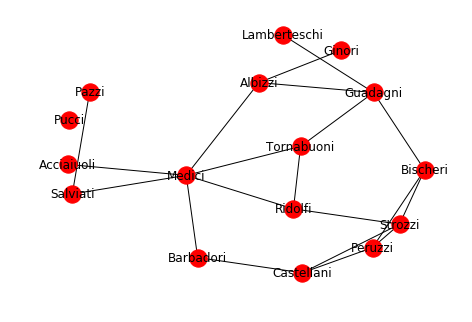

In [11]:
G = nx.Graph()
for row in medici_df.itertuples():
    G.add_node(row.Name)

for edge in edge_list:
    G.add_edge(medici_df.ix[edge[0]].Name, medici_df.ix[edge[1]].Name)
nx.draw(G, with_labels=True)

### Degree Centrality Measures:

#### Degree Centrality: The fraction of edges which originate at a node. 
$$ \frac{k}{m}$$
From page 3 of lecture 2 notes.


#### Harmonic Centrality: $$ C_i' = \frac{1}{n-1} \sum_{(j\neq i)}\frac{1}{d_{ij}}$$


#### Eigenvector Centrality: $$ x_i = \kappa_1^{-1} \sum_jA_{ij}x_j$$

#### Betweenness Centrality: $$ x_i = \frac{1}{n^2} \sum_{st} \frac{n_{st}^{i}}{g_{st}}$$

In [14]:
# Counting the total number of edges twice 
def degree_centrality(G):
    deg_centralities = []
    tot_edges = 2 * len(G.edges())
    degree_dict = nx.degree(G)
    for key in degree_dict.keys():
        deg_centralities.append((key, degree_dict[key] / tot_edges))
#         deg_centralities[key] = degree_dict[key] / tot_edges   
    return deg_centralities

In [15]:
def harmonic_centrality(G):
    # Get the average distance between one node and all others
    distances_dict = nx.all_pairs_shortest_path_length(G)
    total_nodes = len(G.nodes())
    harmonic_centralities = []
    for family in distances_dict.keys():
        distances = [float(1/value) for value in distances_dict[family].values() if value != 0]
        harmonic_centralities.append((family, sum(distances)/ (total_nodes -1)))
    return harmonic_centralities

In [209]:
def eigenvector_centrality(G):
    families = G.nodes()
    A = nx.adjacency_matrix(G).todense()
    eigenvalue = max(np.linalg.eigvals(A))
    x = np.ones(shape=(A.shape[0], 1))
    for i in range(20):
        x = np.matmul(A, x)
        x = np.norm
    eigenvector_centralities = []
    for i in range(A.shape[0]):
        centrality =  A[i] * x / eigenvalue
        centrality = float(centrality)
        eigenvector_centralities.append((families[i], centrality))
    return eigenvector_centralities

In [220]:
# I'm satisfied with the networkx function...
def betweenness_centrality(G):
    betweenness_centralities = []
    bet_cent = nx.betweenness_centrality(G)
    for key in bet_cent.keys():
        betweenness_centralities.append((key, bet_cent[key]/len(G.nodes())**2))
    return betweenness_centralities

In [221]:
betweenness_centrality(G)

[('Guadagni', 0.0008618551587301588),
 ('Pazzi', 0.0),
 ('Albizzi', 0.0007192460317460318),
 ('Acciaiuoli', 0.0),
 ('Strozzi', 0.00034722222222222224),
 ('Pucci', 0.0),
 ('Ginori', 0.0),
 ('Peruzzi', 7.440476190476191e-05),
 ('Castellani', 0.00018601190476190478),
 ('Ridolfi', 0.00038442460317460316),
 ('Tornabuoni', 0.00031001984126984125),
 ('Salviati', 0.0004836309523809524),
 ('Bischeri', 0.0003534226190476191),
 ('Medici', 0.0017671130952380955),
 ('Barbadori', 0.0003162202380952381),
 ('Lamberteschi', 0.0)]

In [222]:
def read_edge_list():
    # Read in data
    medici_list = []
    with open('medici_network/medici_network.txt') as f:
        reader = csv.reader(f)
        for row in reader:
            medici_list.append(row)
#             print(row)
    del f
    
    medici_df = pd.read_csv('medici_network/medici_network_modified.txt', delimiter='\t', header=None)
    medici_df.columns = ['Node', 'Name','Connections']
   
    # Filter string characters from dataframe.
    new_connections = []
    for row in medici_df.itertuples():
        tmp_list = re.sub('\)\s\(', ',),(', row.Connections)
        tmp_list = re.sub('\s', '', tmp_list)
        edge = ast.literal_eval(tmp_list)
        new_connections.append(edge)
        
    # Add nodes
    G = nx.Graph()
    for row in medici_df.itertuples():
        G.add_node(row.Name)
    # Reformat edge list
    edge_list = []
    for i, node in enumerate(new_connections):
        for edge in node:
            edge_list.append((edge[0], i))
    # Connect nodes with new edges.
    for edge in edge_list:
        G.add_edge(medici_df.iloc[edge[0]].Name, medici_df.iloc[edge[1]].Name)
#     nx.draw(G, with_labels=True)
    return G

In [223]:
def run_metrics():
    G = read_edge_list()
    ## Run each of the custom centrality measures
    # Basic
    centralities_df = pd.DataFrame(degree_centrality(G))
    centralities_df.columns=['Name', 'Degree']
    
    # Eigenvector
    eigenvector_df = pd.DataFrame(eigenvector_centrality(G))
    eigenvector_df.columns = ['Name', 'Eigen']
    
#     # Networkx Eigenvector
#     vec_centrality = nx.eigenvector_centrality(G)
#     eigen_centrality_nx = [(key, vec_centrality[key]) for key in vec_centrality.keys()]
#     eigen_nx_df = pd.DataFrame(eigen_centrality_nx)
#     eigen_nx_df.columns = ['Name', 'Eigen_NX']

    # Harmonic
    harmonic_df = pd.DataFrame(harmonic_centrality(G))
    harmonic_df.columns = ['Name', 'Harmonic']
    
    # Betweenness
    betweennes_df = pd.DataFrame(betweenness_centrality(G))
    betweennes_df.columns = ['Name', 'Betweenness']
    
#     final_df = pd.merge(centralities_df, eigenvector_df, on=['Name'])
#     final_df = pd.merge(final_df, eigen_nx_df, on=['Name'])
#     final_df = pd.merge(final_df, harmonic_df, on=['Name'])
#     final_df = pd.merge(final_df, betweennes_df, on=['Name'])
    
    # sort all dataframes:
    centralities_df=centralities_df.sort_values("Degree", ascending=False)
    eigenvector_df = eigenvector_df.sort_values('Eigen',ascending=False)
    harmonic_df = harmonic_df.sort_values("Harmonic",ascending=False)
    betweenness_df = betweenness_df.sort_values("Betweenness",ascending=False)
    
#     if centralities_df.iloc[0].Name == eigenvector_df.iloc[0].Name == harmonic_df.iloc[0].Name == betweenness_df.iloc[0].Name:
    final_df = pd.merge(centralities_df, eigenvector_df, on=['Name'])
    final_df = pd.merge(final_df, eigen_nx_df, on=['Name'])
    final_df = pd.merge(final_df, harmonic_df, on=['Name'])
    final_df = pd.merge(final_df, betweennes_df, on=['Name'])

#         return final_df
#     else:
#         return None
    
    return final_df, centralities_df, eigenvector_df, eigen_nx_df, harmonic_df, betweennes_df

In [228]:
def main():
    G = read_edge_list()
    ## Run each of the custom centrality measures
    # Basic
    centralities_df = pd.DataFrame(degree_centrality(G))
    centralities_df.columns=['Name', 'Degree']
    
    # Eigenvector
#     eigenvector_df = pd.DataFrame(eigenvector_centrality(G))
#     eigenvector_df.columns = ['Name', 'Eigen']
    
#     # Networkx Eigenvector
    vec_centrality = nx.eigenvector_centrality(G)
    eigen_centrality_nx = [(key, vec_centrality[key]) for key in vec_centrality.keys()]
    eigen_nx_df = pd.DataFrame(eigen_centrality_nx)
    eigen_nx_df.columns = ['Name', 'Eigen_NX']

    # Harmonic
    harmonic_df = pd.DataFrame(harmonic_centrality(G))
    harmonic_df.columns = ['Name', 'Harmonic']
    
    # Betweenness
    betweennes_df = pd.DataFrame(betweenness_centrality(G))
    betweennes_df.columns = ['Name', 'Betweenness']
    
    final_df = pd.merge(centralities_df, eigenvector_df, on=['Name'])
    final_df = pd.merge(final_df, eigen_nx_df, on=['Name'])
    final_df = pd.merge(final_df, harmonic_df, on=['Name'])
    final_df = pd.merge(final_df, betweennes_df, on=['Name'])

    
    return final_df, centralities_df, eigenvector_df, eigen_nx_df, harmonic_df, betweennes_df, G

In [229]:
final_df, centralities_df, eigenvector_df, eigen_nx_df, harmonic_df, betweennes_df, G= main()


In [230]:
betweennes_df

Name  Betweenness
0       Guadagni     0.000862
1          Pazzi     0.000000
2        Albizzi     0.000719
3     Acciaiuoli     0.000000
4        Strozzi     0.000347
5          Pucci     0.000000
6         Ginori     0.000000
7        Peruzzi     0.000074
8     Castellani     0.000186
9        Ridolfi     0.000384
10    Tornabuoni     0.000310
11      Salviati     0.000484
12      Bischeri     0.000353
13        Medici     0.001767
14     Barbadori     0.000316
15  Lamberteschi     0.000000

In [231]:
final_df, centralities_df, eigenvector_df, eigen_nx_df, harmonic_df, betweennes_df, G= main()
final_df = final_df.sort_values('Betweenness',ascending=False).round(3)
final_df

Name  Degree         Eigen  Eigen_NX  Harmonic  Betweenness
13        Medici   0.150  2.714815e+10     0.430     0.633        0.002
0       Guadagni   0.100  1.824010e+10     0.289     0.539        0.001
2        Albizzi   0.075  1.526593e+10     0.244     0.522        0.001
11      Salviati   0.050  9.131677e+09     0.146     0.439        0.000
9        Ridolfi   0.075  2.144708e+10     0.342     0.533        0.000
12      Bischeri   0.075  1.774197e+10     0.283     0.480        0.000
4        Strozzi   0.100  2.238958e+10     0.356     0.522        0.000
14     Barbadori   0.050  1.326880e+10     0.212     0.472        0.000
10    Tornabuoni   0.075  2.043122e+10     0.326     0.522        0.000
8     Castellani   0.075  1.628639e+10     0.259     0.461        0.000
7        Peruzzi   0.075  1.733161e+10     0.276     0.452        0.000
1          Pazzi   0.025  2.832964e+09     0.045     0.318        0.000
3     Acciaiuoli   0.025  8.272077e+09     0.132     0.394        0.000
5          Pucci   0.000  0.000000e+00     0.000     0.000        0.000
6         Ginori   0.025  4.736271e+09     0.075     0.356        0.000
15  Lamberteschi   0.025  5.556878e+09     0.089     0.358        0.000

In [204]:
final_df.iloc[0].Name

'Medici'

In [205]:
a = nx.harmonic_centrality(G)

for key, value in a.items():
    a[key] = value/15
a

{'Acciaiuoli': 0.39444444444444443,
 'Albizzi': 0.5222222222222223,
 'Barbadori': 0.4722222222222222,
 'Bischeri': 0.4799999999999999,
 'Castellani': 0.4611111111111111,
 'Ginori': 0.3555555555555555,
 'Guadagni': 0.5388888888888889,
 'Lamberteschi': 0.35777777777777775,
 'Medici': 0.6333333333333333,
 'Pazzi': 0.3177777777777778,
 'Peruzzi': 0.4522222222222222,
 'Pucci': 0.0,
 'Ridolfi': 0.5333333333333333,
 'Salviati': 0.43888888888888894,
 'Strozzi': 0.5222222222222221,
 'Tornabuoni': 0.5222222222222223}

### Write the centrality metrics to csv

In [232]:
centralities_df=centralities_df.sort_values('Degree', ascending=False).round(3)
centralities_df.to_csv('degree_centralities.csv', index=False)

eigenvector_df=eigenvector_df.sort_values('Eigen', ascending=False).round(3)
eigenvector_df.to_csv('eigenvector_centralities.csv', index=False)

eigen_nx_df=eigen_nx_df.sort_values('Eigen_NX', ascending=False).round(3)
eigen_nx_df.to_csv('eigenvector_nx_centralities.csv', index=False)

harmonic_df=harmonic_df.sort_values('Harmonic', ascending=False).round(3)
harmonic_df.to_csv('harmonic_centralities.csv', index=False)

betweennes_df=betweennes_df.sort_values('Betweenness', ascending=False).round(3)
betweennes_df.to_csv('betweenness_centralities.csv', index=False)

In [86]:
def create_lists(dataframe):
    degree = []
    betweenness = []
    eigen = []
    eigennx = []
    harmonic = []
    
    for row in dataframe.itertuples():
        degree.append((row.Name, row.Degree))
        betweenness.append((row.Name, row.Betweenness))
        eigen.append((row.Name, row.Eigen))
        eigennx.append((row.Name, row.Eigen_NX))
        harmonic.append((row.Name, row.Harmonic))
        
    return degree, betweenness, eigen, eigennx, harmonic

In [87]:
degree, betweenness, eigen, eigennx, harmonic = create_lists(final_df)

In [88]:
degree

[('Medici', 0.14999999999999999),
 ('Guadagni', 0.10000000000000001),
 ('Albizzi', 0.074999999999999997),
 ('Salviati', 0.050000000000000003),
 ('Ridolfi', 0.074999999999999997),
 ('Bischeri', 0.074999999999999997),
 ('Strozzi', 0.10000000000000001),
 ('Barbadori', 0.050000000000000003),
 ('Tornabuoni', 0.074999999999999997),
 ('Castellani', 0.074999999999999997),
 ('Peruzzi', 0.074999999999999997),
 ('Pazzi', 0.025000000000000001),
 ('Acciaiuoli', 0.025000000000000001),
 ('Pucci', 0.0),
 ('Ginori', 0.025000000000000001),
 ('Lamberteschi', 0.025000000000000001)]

## Configuration Model

In [163]:
model_data = defaultdict(list)
for key in models.keys():
    model_data[key] = [x-model_means[key] for x in models[key]]

In [277]:
G.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [290]:
G= read_edge_list()
N = {}
G_obs = {}
index = []

for i, key in enumerate(G.degree().keys()):
    N[i] = G.degree()[key]
    index.append((key, i))
    
obs_harmonic = harmonic_centrality(G)
for i, row in enumerate(obs_harmonic):
    G_obs[i] = row[1]
   

In [312]:
index

[('Guadagni', 0),
 ('Pazzi', 1),
 ('Albizzi', 2),
 ('Acciaiuoli', 3),
 ('Strozzi', 4),
 ('Pucci', 5),
 ('Ginori', 6),
 ('Peruzzi', 7),
 ('Castellani', 8),
 ('Ridolfi', 9),
 ('Tornabuoni', 10),
 ('Salviati', 11),
 ('Bischeri', 12),
 ('Medici', 13),
 ('Barbadori', 14),
 ('Lamberteschi', 15)]

In [311]:
for i in index:
    print(i[0]) 

Guadagni
Pazzi
Albizzi
Acciaiuoli
Strozzi
Pucci
Ginori
Peruzzi
Castellani
Ridolfi
Tornabuoni
Salviati
Bischeri
Medici
Barbadori
Lamberteschi


In [279]:
G.degree()

{'Acciaiuoli': 1,
 'Albizzi': 3,
 'Barbadori': 2,
 'Bischeri': 3,
 'Castellani': 3,
 'Ginori': 1,
 'Guadagni': 4,
 'Lamberteschi': 1,
 'Medici': 6,
 'Pazzi': 1,
 'Peruzzi': 3,
 'Pucci': 0,
 'Ridolfi': 3,
 'Salviati': 2,
 'Strozzi': 4,
 'Tornabuoni': 3}

In [323]:
# Using Configuration Model
from collections import defaultdict
models = defaultdict(list)
for i in range(1000):
    config_model = nx.configuration_model(N)
    G = nx.Graph(config_model)
    G.remove_edges_from(G.selfloop_edges())
    config_harmonic_centralities = harmonic_centrality(G)
    for row in config_harmonic_centralities:
        models[row[0]].append(row[1])

In [319]:
# Using Random Degree Sequence Graph
from collections import defaultdict
models = defaultdict(list)
for i in range(1000):
    config_model = nx.random_degree_sequence_graph(N.values())
    G = nx.Graph(config_model)
    G.remove_edges_from(G.selfloop_edges())
    config_harmonic_centralities = harmonic_centrality(G)
    for row in config_harmonic_centralities:
        models[row[0]].append(row[1])

In [324]:
model_diff = {}
for key in models.keys():
    model_diff[key] = [G_obs[key] - x for x in models[key]]
#     model_means[key] = np.mean(tmp)
#     model_means[key] = np.mean(models[key])
    

In [325]:
mean_list = []
p_25_list = []
p_75_list = []
# median_list = []
# plot_data = []
for i in range(len(model_diff.keys())):    
    mean = np.mean(model_diff[i])
#     median = np.percentile(model_data[i], 50)

    p_25 = np.percentile(model_diff[i], 25)
    p_75 = np.percentile(model_diff[i], 75)
#     plot_data.append([p_25, mean, p_75])
#     median_list.append(median)
    mean_list.append(mean)
    p_25_list.append(p_25)
    p_75_list.append(p_75)
idx = [i for i in range(len(mean_list))]


### Plot distances

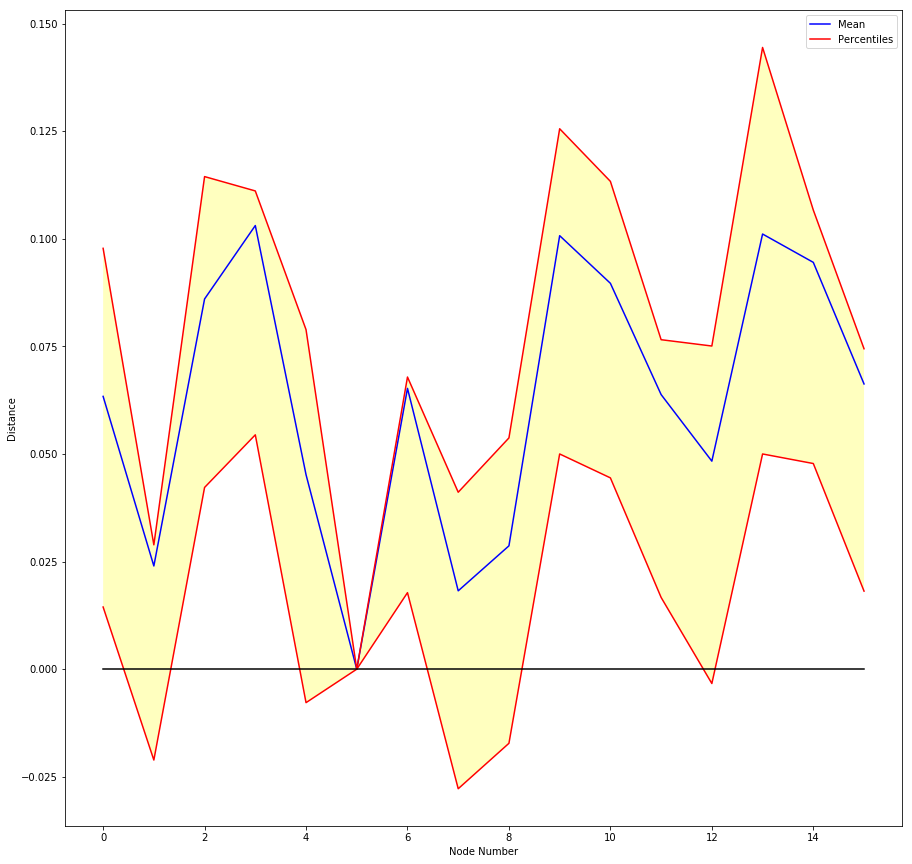

In [326]:
# zero = [0 for i in r]
fig, ax = plt.pyplot.subplots(1, figsize=(15, 15))
ax.plot(idx, mean_list, label='Mean', color='b')
# ax.plot(idx, median_list, label = 'Median', color='g')
ax.plot(idx, p_75_list, 'r', label='Percentiles')
ax.plot(idx, p_25_list, 'r', )
ax.plot(idx, [0] * len(idx) , 'k')
ax.fill_between(idx, p_75_list, p_25_list, facecolor='yellow', alpha=0.25)
ax.legend()
ax.set_xlabel("Node Number")
ax.set_ylabel("Distance")
# ax.set_xticklabels([i[0] for i in index], minor=False)


In [100]:
plot_data

[[-0.66299999999999981, 1.8829382497642654e-16, 0.33700000000000019],
 [0.0, 0.0, 0.0],
 [0.17700000000000005, 4.618527782440651e-17, 0.17700000000000005],
 [0.0, 0.0, 0.0],
 [-0.66299999999999981, 1.8118839761882554e-16, 0.33700000000000019],
 [0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0],
 [0.18599999999999994, -5.6843418860808016e-17, 0.18599999999999994],
 [0.15799999999999992, -8.171241461241152e-17, 0.15799999999999992],
 [0.19200000000000017, 1.7053025658242405e-16, 0.19200000000000017],
 [0.20000000000000018, 1.7763568394002506e-16, 0.20000000000000018],
 [0.066000000000000059, 5.7731597280508142e-17, 0.066000000000000059],
 [0.16500000000000004, 3.552713678800501e-17, 0.16500000000000004],
 [-0.30700000000000038, -3.836930773104541e-16, 0.69299999999999962],
 [0.058999999999999941, -5.595524044110789e-17, 0.058999999999999941],
 [0.0, 0.0, 0.0]]

In [101]:
p

ValueError: too many values to unpack (expected 3)

In [ ]:
for i, model in enumerate(models):
    plt.pyplot.figure(i)
    nx.draw(model)

In [ ]:
A = nx.Graph(config_model)

### Extra Credit

/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/usr/local/lib/python3.5/dist-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


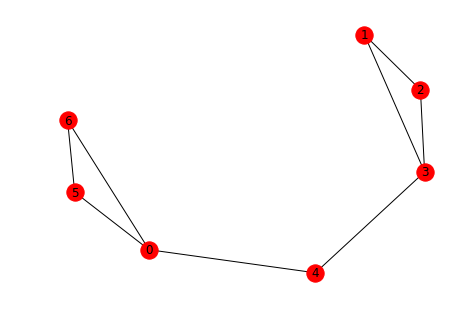

In [401]:
G = nx.Graph()
G.add_nodes_from(nodes=range(7))
edges =[
    (1, 2),
    (1, 3),
    (2, 3),
    (3, 4), 
    (4, 0), 
    (0, 5),
    (0, 6),
    (5, 6), 
]
G.add_edges_from(edges)
nx.draw(G, with_labels=True)

In [406]:
betweenness_centralities = betweenness_centrality(G)
degree_centralities = degree_centrality(G)
centralities_df = pd.DataFrame(degree_centralities)
betweenness_df = pd.DataFrame(betweenness_centralities)
centralities_df.columns=['Node', 'Degree']
betweenness_df.columns = ['Node', 'Betweenness']
# centralities_df = centralities_df.merge(betweenness_df, on=['Node'])

In [407]:
centralities_df.sort_values('Degree', ascending=False)

Node  Degree
0     0  0.1875
3     3  0.1875
1     1  0.1250
2     2  0.1250
4     4  0.1250
5     5  0.1250
6     6  0.1250

In [410]:
betweenness_df.sort_values('Betweenness', ascending=False)

Node  Betweenness
4     4     0.012245
0     0     0.010884
3     3     0.010884
1     1     0.000000
2     2     0.000000
5     5     0.000000
6     6     0.000000

In [408]:
centralities_df.sort_values('Betweenness', ascending=False)

KeyError: 'Betweenness'

### Create all possible versions of a graph with n nodes

In [62]:
def create_all_edges(n):
    edges = []
    for i in range(n-1):
        for j in range(i+1, n):
            edges.append((i, j))
    return edges

In [63]:
edges = create_all_edges(4)

In [68]:
a = list(itertools.combinations(edges, 2))

In [69]:
a

[((0, 1), (0, 2)),
 ((0, 1), (0, 3)),
 ((0, 1), (1, 2)),
 ((0, 1), (1, 3)),
 ((0, 1), (2, 3)),
 ((0, 2), (0, 3)),
 ((0, 2), (1, 2)),
 ((0, 2), (1, 3)),
 ((0, 2), (2, 3)),
 ((0, 3), (1, 2)),
 ((0, 3), (1, 3)),
 ((0, 3), (2, 3)),
 ((1, 2), (1, 3)),
 ((1, 2), (2, 3)),
 ((1, 3), (2, 3))]

In [395]:
def find_graph(G):
    harmonic_centralities = harmonic_centrality(G)
    degree_centralities = degree_centrality(G)
    centralities_df = pd.DataFrame(degree_centralities)
    harmonic_df = pd.DataFrame(harmonic_centralities)
    centralities_df.columns=['Node', 'Degree']
    harmonic_df.columns = ['Node', 'Harmonic']
    centralities_df=centralities_df.sort_values("Degree")
    harmonic_df=harmonic_df.sort_values("Harmonic")
    if harmonic_df.iloc[0].Node != centralities_df.iloc[0].Node:
        centralities_df = centralities_df.merge(harmonic_df, on=['Node'])        
        return centralities_df
    else:
        return None

In [396]:
import itertools
def create_graph_set(n):
    G = nx.Graph()
    G.add_nodes_from(nodes=range(n))
    all_edges = create_all_edges(n)
    connected_graphs = []
    
    # Create a graph with every permutation of edges.
    for i in range(2, n + 1):
        # list of all permutations of i edges
        edges = list(itertools.combinations(all_edges, i**2))
        for permutation in edges:
            G = nx.Graph()
            G.add_nodes_from(nodes=range(n))
            G.add_edges_from(permutation)
            if nx.is_connected(G):
                df = find_graph(G)
                if df is not None:
                    connected_graphs.append(G)
    return connected_graphs

In [397]:
for i in range(3):
    print(harmonic_df.iloc[i].Node)

0.0
1.0
2.0


In [400]:
graph_list = create_graph_set(7)
# for g in graph_list:
    
#     nx.draw(g)

KeyboardInterrupt: 

In [ ]:
graph_list